In [1]:
rm(list=ls())

#########################################################################
### -- ANAL?TICA PREDICTIVA DE DATOS -- ## 
#########################################################################

#########################################################################

#########################################################################

########### 1) LIBRERIAS A UTILIZAR ################# 

# Comandos necesarios para el ACP o PCA

# La funcion de R que nos permite realizar el PCA se llama princomp:

# princomp(dataset)

# Es importante que el conjunto de datos solo contenga variables 
# numericas, puesto que para el calculo de 
# las componentes necesitamos estimar una matriz de correlacion 
# o de covarianzas. 
# Si hubiera variables NO numericas en el conjunto de datos, 
# debemos excluirlas con el comando [ , ].
# La funcion princomp nos mostrara las varianzas de cada una de 
# las componentes. Sin embargo, 
# existen mas resultados que involucran al PCA y no son 
# visualizados por defecto, entre ellos las 
# cargas y los factores. Para organizar correctamente el 
# output de este analisis podemos guadar todas 
# los elementos del output en un objeto como se muestra a
# continuacion:
        
# Mi.modelo.PCA <- princomp(dataset)

# Una vez guardado los resultados en un objeto, poderemos 
# recuperar todos los outputs de manera 
# conveniente. Por ejemplo, puedes utilizar la funcion 
# summary() para visualizar las varianzas de 
# cada componente, las cargas y los factores:

# summary(Mi.modelo.PCA)

# Para visualizar solo las cargas: > Mi.modelo.PCA$loadings
# Para visualizar los scores: > Mi.modelo.PCA$scores

datos <- read.csv("./datasets/comprar_alquilar.csv")

In [2]:
datos

ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
6000,1000,0,600,50000,400000,0,2,2,1
6745,944,123,429,43240,636897,1,3,6,0
6455,1033,98,795,57463,321779,2,1,8,1
7098,1278,15,254,54506,660933,0,0,3,0
6167,863,223,520,41512,348932,0,0,3,1
5692,911,11,325,50875,360863,1,4,5,1
6830,1298,345,309,46761,429812,1,1,5,1
6470,1035,39,782,57439,606291,0,0,1,0
6251,1250,209,571,50503,291010,0,0,3,1
6987,1258,252,245,40611,324098,2,1,7,1


In [3]:
pca.datos <- prcomp(datos[,1:9],scale=TRUE) 
# Scale = False -> utilizamos la matriz de COVARIANZA para obtener las componentes! Veamos que ocurre:

# Resumen
summary(pca.datos)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.6408 1.4479 1.0267 0.9807 0.93122 0.7118 0.61082
Proportion of Variance 0.2991 0.2329 0.1171 0.1069 0.09635 0.0563 0.04146
Cumulative Proportion  0.2991 0.5321 0.6492 0.7560 0.85241 0.9087 0.95016
                           PC8     PC9
Standard deviation     0.52116 0.42065
Proportion of Variance 0.03018 0.01966
Cumulative Proportion  0.98034 1.00000

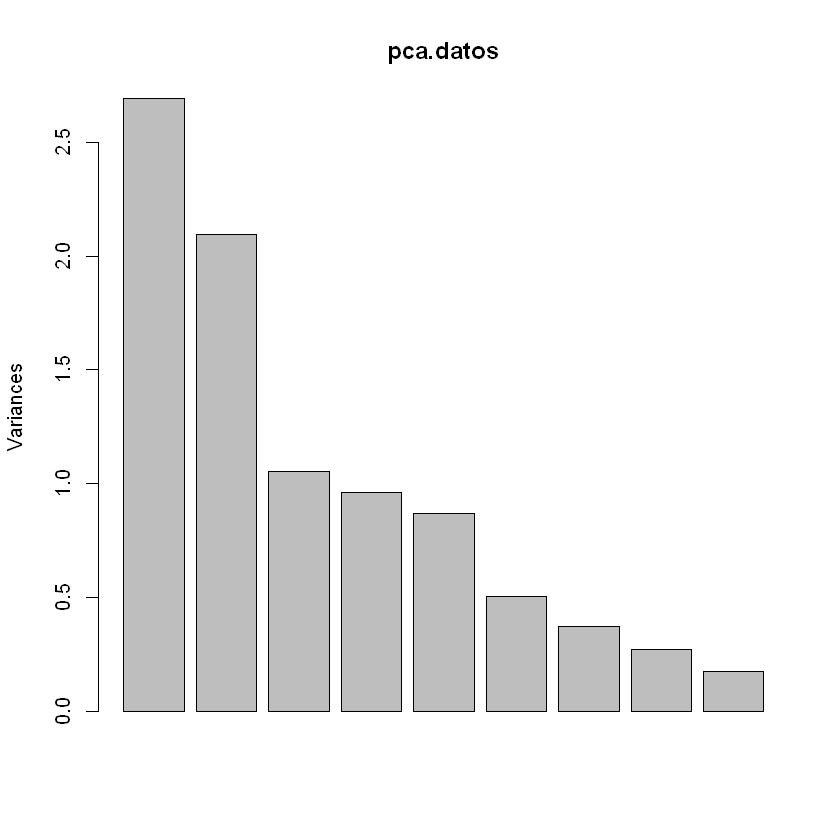

In [4]:
# Grafico de la varianza explicada
plot(pca.datos)

In [5]:
require(ggplot2)
theta <- seq(0,2*pi,length.out = 70)
circle <- data.frame(x = cos(theta), y = sin(theta))
p <- ggplot(circle,aes(x,y)) + geom_path()

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


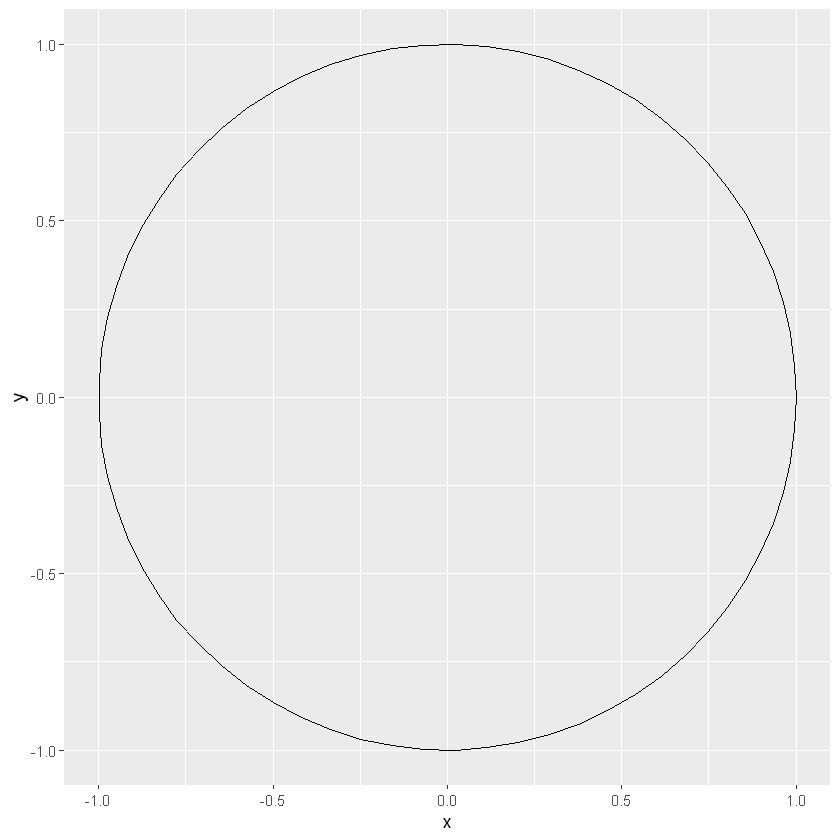

In [6]:
p

In [7]:
loadings <- data.frame(pca.datos$rotation, 
                       .names = row.names(pca.datos$rotation))

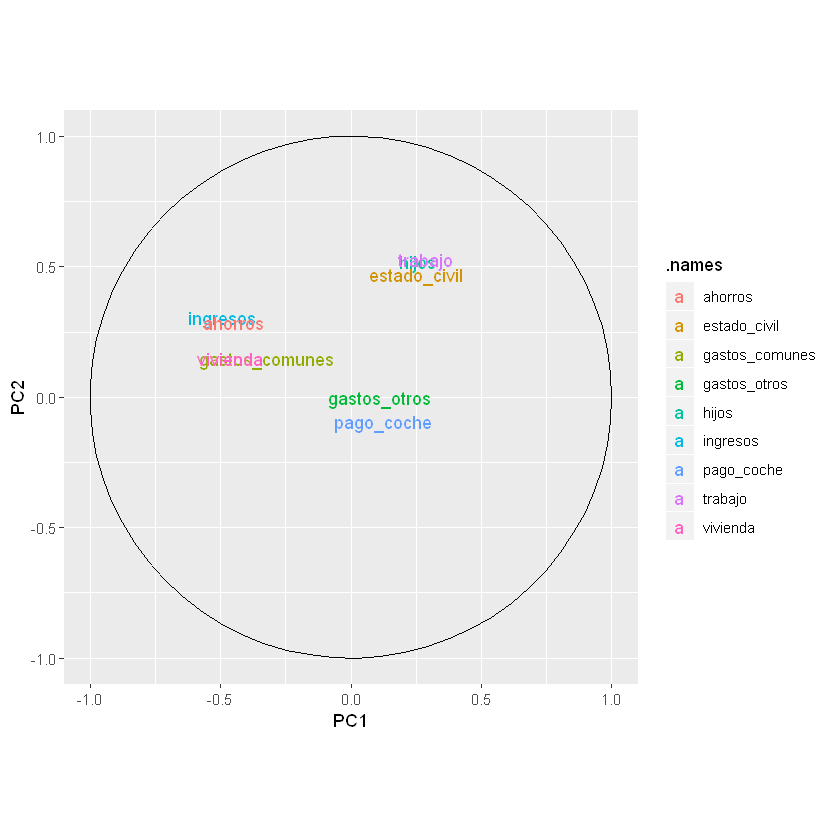

In [8]:
p + geom_text(data=loadings, mapping=aes(x = PC1, y = PC2, label = .names, colour = .names)) + coord_fixed(ratio=1) +  labs(x = "PC1", y = "PC2")

In [9]:
pca.datos$sdev # Criterio de Kasiser
pca.datos$rotation # cargas de cada componente.


head(pca.datos$x, 5) # Matriz de datos (solo primeras 5 filas) con las componentes 

[1] 1.6407986 1.4479444 1.0266507 0.9806661 0.9312224 0.7118202 0.6108209
[8] 0.5211561 0.4206546

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ingresos,-0.4937203,0.3069585229,-0.09141925,0.111222044,-8.889655e-02,0.07547726,-0.15431890,0.01273153,0.77698974
gastos_comunes,-0.3182287,0.1473726341,-0.36345316,0.081629625,-7.630059e-01,-0.06790280,0.10559750,-0.01027447,-0.37443974
pago_coche,0.1237706,-0.0916409584,-0.51614411,0.780267686,2.655536e-01,0.15369652,-0.02733309,0.06175856,-0.04855731
gastos_otros,0.1118757,0.0001115934,0.70198591,0.590704378,-3.307437e-01,-0.15442233,-0.10187618,-0.03797725,0.02663127
ahorros,-0.4446503,0.2884348823,0.19176735,0.022839130,2.890022e-01,0.23018052,-0.52458392,0.21275895,-0.47416776
vivienda,-0.4626086,0.1489848864,0.14051329,0.150085403,3.655556e-01,-0.29079856,0.64103363,-0.26084654,-0.15610084
estado_civil,0.2522789,0.4690439598,-0.17288478,-0.007663096,1.046389e-01,-0.76706996,-0.21236527,0.20481650,-0.00328929
hijos,0.2598587,0.5218938719,0.11218356,0.007404048,-4.366790e-02,0.38796361,0.46006668,0.53221626,0.01105122
trabajo,0.2902475,0.5271556382,-0.03691018,-0.007492711,-8.654730e-06,0.25644600,-0.10505341,-0.74563042,-0.06065726


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-1.31863913,-0.22239791,1.5958976,-0.8828210,-0.64501455,0.69847244,0.3172424,0.7499461,0.2693149
-1.14503294,1.71271211,0.3947412,-0.4468498,0.68610075,0.23139399,1.5386647,-0.2212489,0.4373386
-0.09014468,1.83151592,1.3560127,0.3366685,-0.74054686,-0.59155989,-1.5366772,-0.6664638,0.1530824
-3.44733348,-0.07808548,-0.2018803,-1.5696839,0.06838149,0.05181628,0.9071553,-0.6827893,-0.1287254
-0.91466060,-1.18174026,0.1895648,0.1175117,0.14738638,0.61821384,-0.4493023,-0.1938599,0.6857484


In [10]:
# (en columnas las nuevas variables).
pca.datos$sdev # Autovalores de los Componentes

[1] 1.6407986 1.4479444 1.0266507 0.9806661 0.9312224 0.7118202 0.6108209
[8] 0.5211561 0.4206546

In [11]:
pca.datos$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ingresos,-0.4937203,0.3069585229,-0.09141925,0.111222044,-8.889655e-02,0.07547726,-0.15431890,0.01273153,0.77698974
gastos_comunes,-0.3182287,0.1473726341,-0.36345316,0.081629625,-7.630059e-01,-0.06790280,0.10559750,-0.01027447,-0.37443974
pago_coche,0.1237706,-0.0916409584,-0.51614411,0.780267686,2.655536e-01,0.15369652,-0.02733309,0.06175856,-0.04855731
gastos_otros,0.1118757,0.0001115934,0.70198591,0.590704378,-3.307437e-01,-0.15442233,-0.10187618,-0.03797725,0.02663127
ahorros,-0.4446503,0.2884348823,0.19176735,0.022839130,2.890022e-01,0.23018052,-0.52458392,0.21275895,-0.47416776
vivienda,-0.4626086,0.1489848864,0.14051329,0.150085403,3.655556e-01,-0.29079856,0.64103363,-0.26084654,-0.15610084
estado_civil,0.2522789,0.4690439598,-0.17288478,-0.007663096,1.046389e-01,-0.76706996,-0.21236527,0.20481650,-0.00328929
hijos,0.2598587,0.5218938719,0.11218356,0.007404048,-4.366790e-02,0.38796361,0.46006668,0.53221626,0.01105122
trabajo,0.2902475,0.5271556382,-0.03691018,-0.007492711,-8.654730e-06,0.25644600,-0.10505341,-0.74563042,-0.06065726


In [12]:
pca.datos$x # Puntuaciones factoriales

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-1.31863913,-0.222397907,1.59589762,-0.882821025,-0.64501455,0.69847244,0.31724243,0.749946113,0.26931487
-1.14503294,1.712712106,0.39474122,-0.446849775,0.68610075,0.23139399,1.53866467,-0.221248851,0.43733860
-0.09014468,1.831515916,1.35601268,0.336668537,-0.74054686,-0.59155989,-1.53667718,-0.666463769,0.15308243
-3.44733348,-0.078085483,-0.20188030,-1.569683944,0.06838149,0.05181628,0.90715532,-0.682789346,-0.12872540
-0.91466060,-1.181740265,0.18956482,0.117511748,0.14738638,0.61821384,-0.44930234,-0.193859853,0.68574843
-0.16127491,1.583763211,0.42087878,-1.876627816,0.15604298,1.02248204,0.55954201,1.044832897,0.16311401
-1.32600250,0.618294200,-1.82489948,0.398554239,-0.03574077,0.35005749,-0.01865779,-0.142030013,0.03282592
-2.72239424,-0.768246706,2.26775212,0.270786685,-0.30254064,-0.41808111,0.28260598,-0.057248759,0.02032996
-1.40556363,-0.860456657,-0.02149946,0.279018117,-1.07795719,0.70402651,-0.87854379,-0.005330169,0.02630721
-0.41365709,1.451831148,-2.07552521,-0.548252304,-0.26436157,-0.25861684,-0.63710782,-0.387422386,0.42352932


In [13]:
source("./ins_paquetes.R")
ins_paquetes('ggfortify')


Bellow Packages Successfully Installed:

ggfortify 
     TRUE 


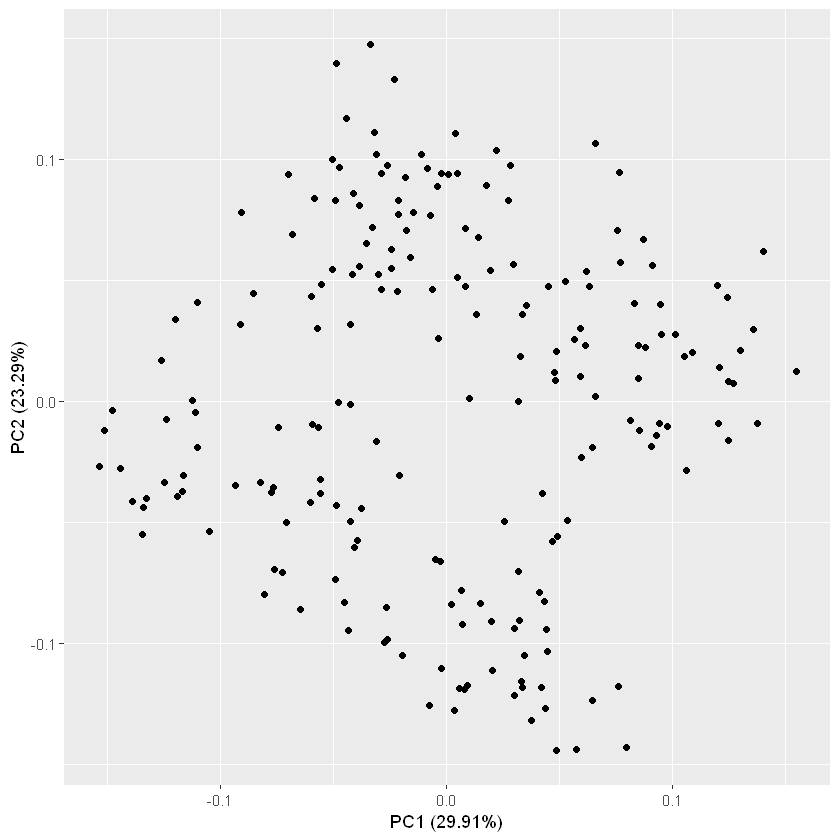

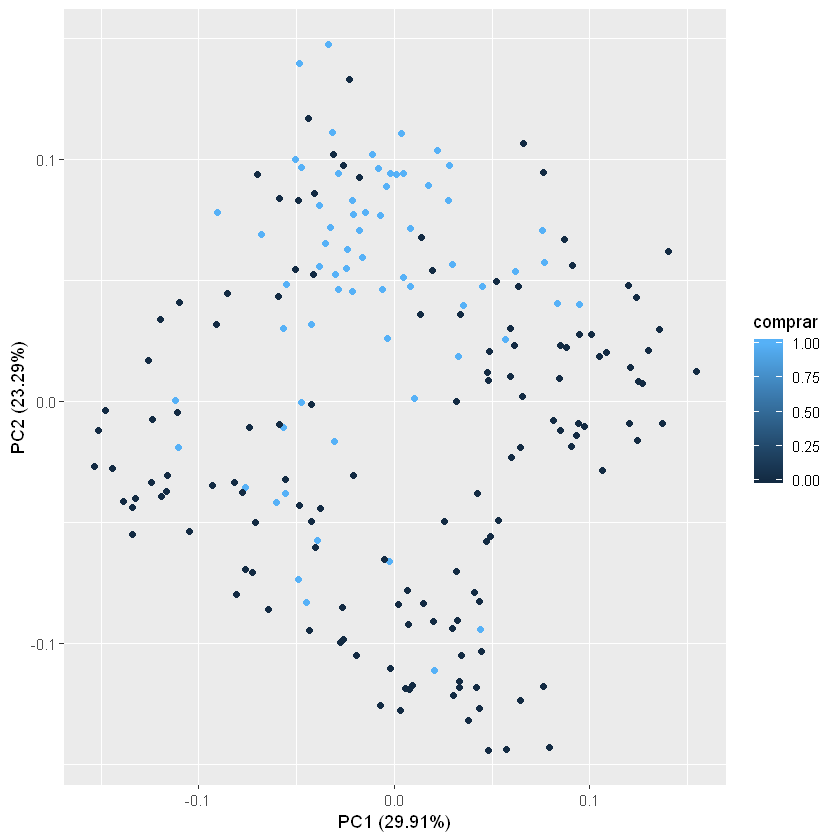

In [14]:
library(ggfortify)
autoplot(pca.datos)
autoplot(pca.datos, data = datos, colour = 'comprar')

In [15]:
library(readxl)

In [16]:
my_data <- read_excel('./datasets/Cars.xls')

In [17]:
head(my_data)

Country,Car,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
U.S.,Buick Estate Wagon,16.9,4.360,2.73,155,350,8
U.S.,Ford Country Squire Wagon,15.5,4.054,2.26,142,351,8
U.S.,Chevy Malibu Wagon,19.2,3.605,2.56,125,267,8
U.S.,Chrysler LeBaron Wagon,18.5,3.940,2.45,150,360,8
U.S.,Chevette,30.0,2.155,3.70,68,98,4
Japan,Toyota Corona,27.5,2.560,3.05,95,134,4


Analisis de componenetes principales solo se trabaja con columnas numericas

In [18]:
df <- my_data[c(3, 4,5,6,7,8)]

In [19]:
df

MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
16.9,4.360,2.73,155,350,8
15.5,4.054,2.26,142,351,8
19.2,3.605,2.56,125,267,8
18.5,3.940,2.45,150,360,8
30.0,2.155,3.70,68,98,4
27.5,2.560,3.05,95,134,4
27.2,2.300,3.54,97,119,4
30.9,2.230,3.37,75,105,4
20.3,2.830,3.90,103,131,5
17.0,3.140,3.50,125,163,6


In [20]:
pca.df <- prcomp(df,scale=TRUE) 
summary(pca.df)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6
Standard deviation     2.245 0.8057 0.36487 0.33196 0.22126 0.13622
Proportion of Variance 0.840 0.1082 0.02219 0.01837 0.00816 0.00309
Cumulative Proportion  0.840 0.9482 0.97038 0.98875 0.99691 1.00000

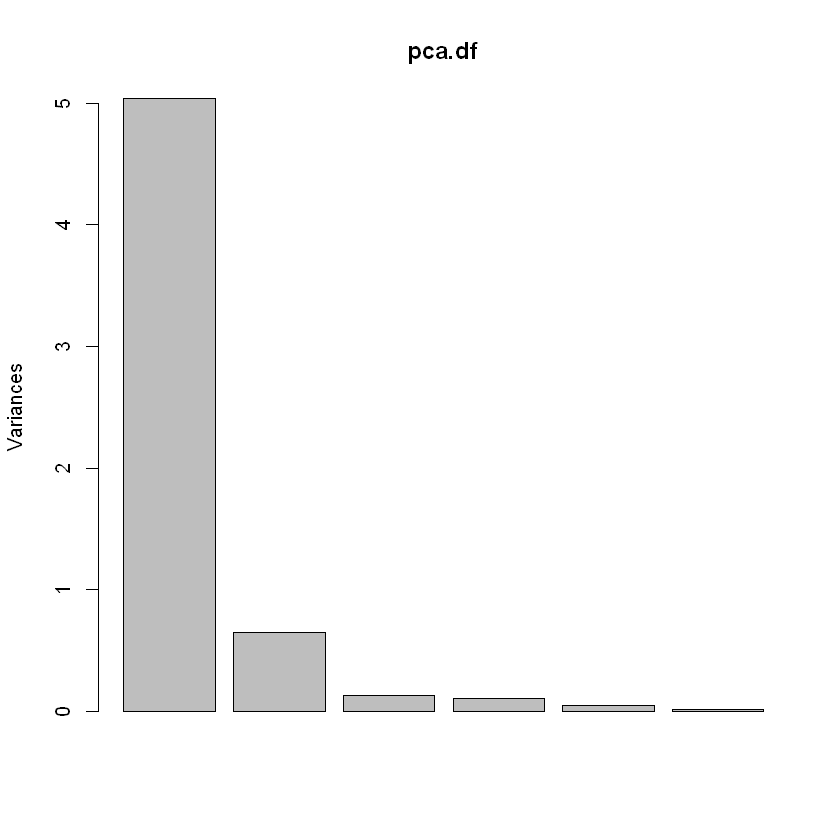

In [21]:
# Grafico de la varianza explicada
plot(pca.df)

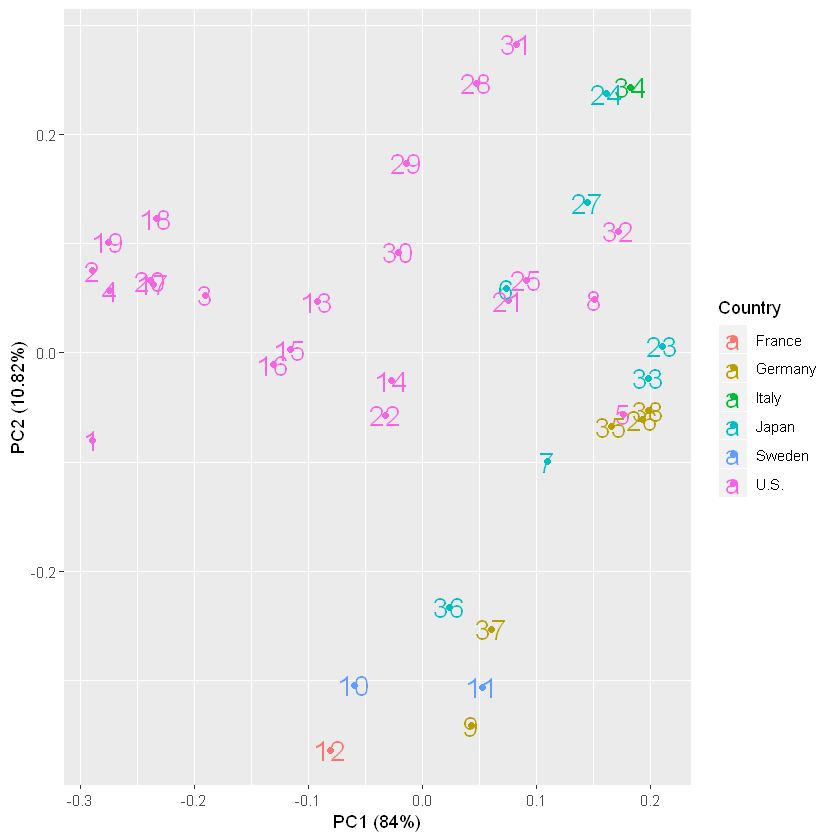

In [22]:
autoplot(pca.df, data = my_data, colour = 'Country', label = TRUE, label.size = 6)

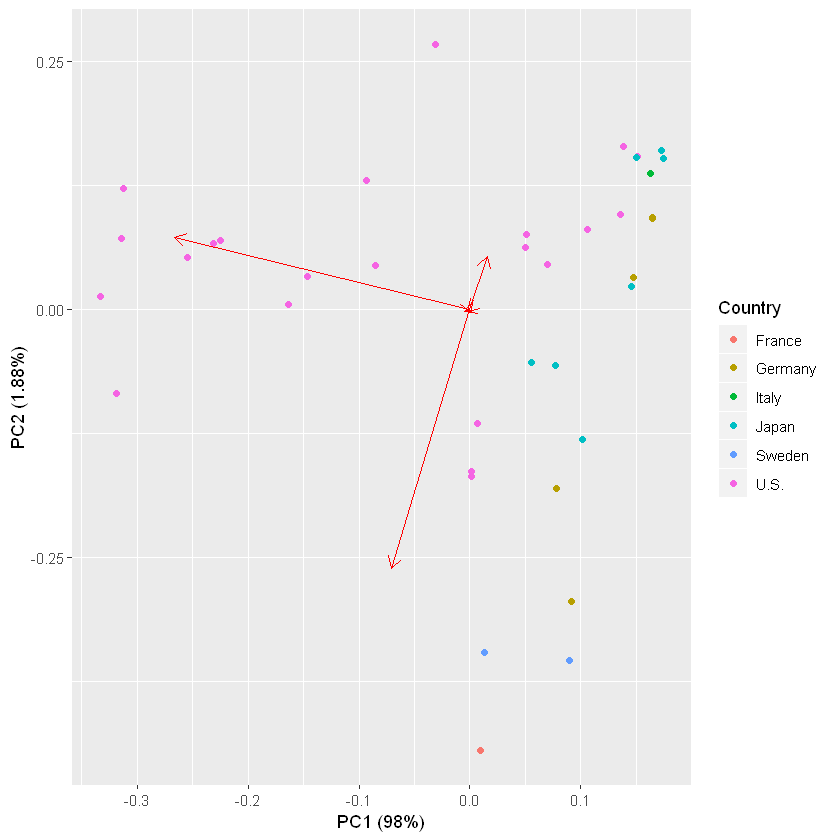

In [23]:
autoplot(prcomp(df), data = my_data, colour = 'Country', loadings = TRUE)

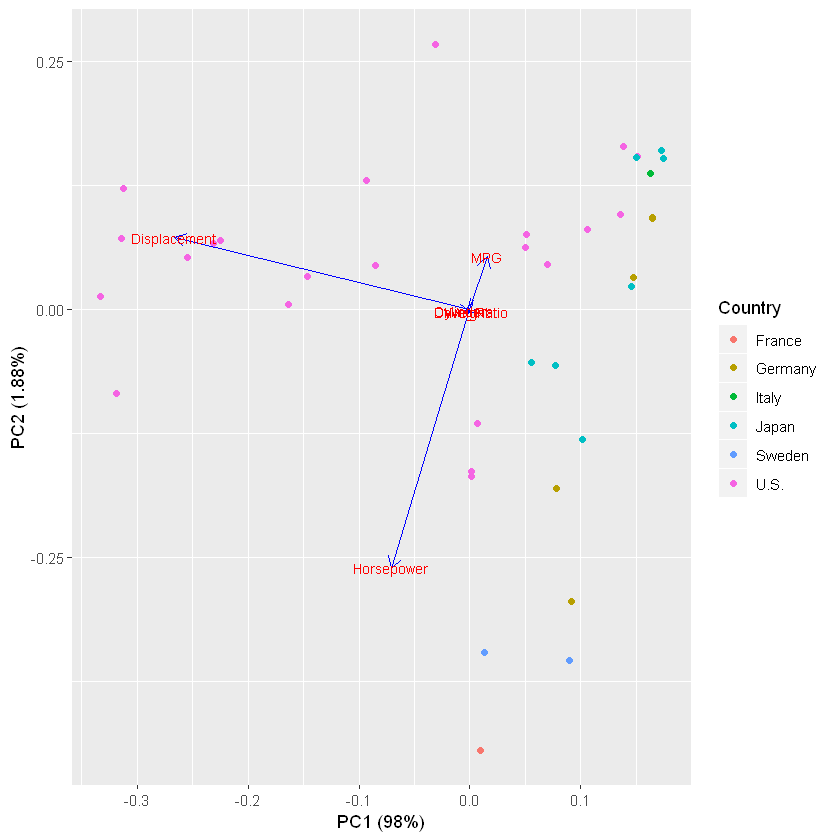

In [24]:
autoplot(prcomp(df), data = my_data, colour = 'Country',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)

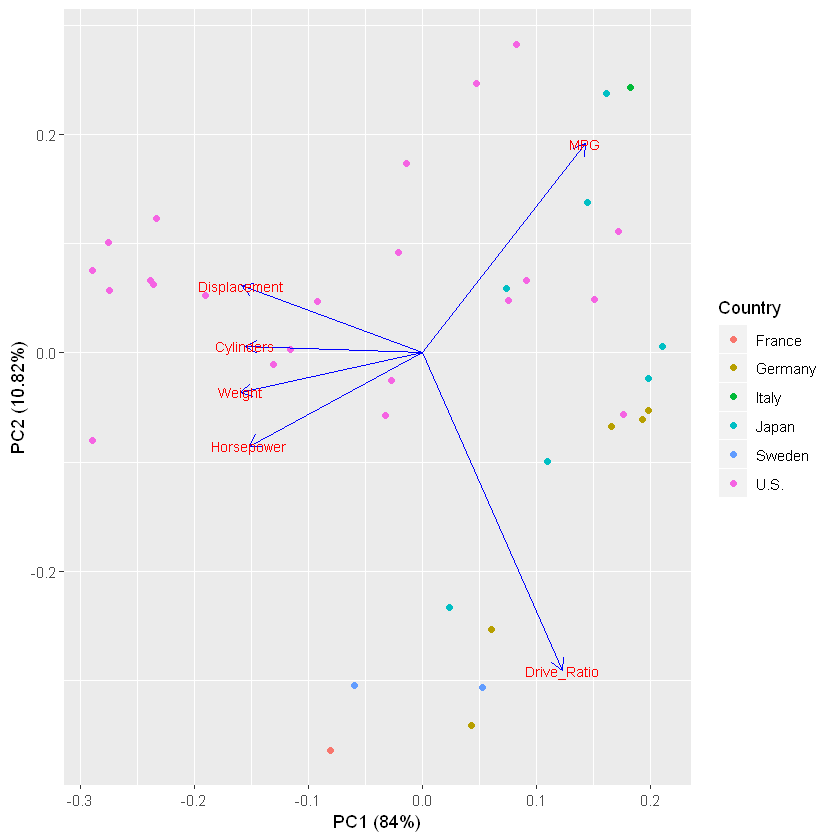

In [25]:
autoplot(pca.df, data = my_data, colour = 'Country',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)